In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from requirements import *
from utils.tl.state_transitions import *
from utils.pl.plot_trends import *

## Import AnnDatas

In [56]:
# Read in KG146 tumor data for mapping
filepath = f'{data_dir}/h5ads/Tumor.h5ad'
ad_tum = sc.read_h5ad(filepath, backed=False)

In [52]:
# Read in KG146 tumor data for mapping
filepath = f'{data_dir}/h5ads/Wang_etal_Tumor.h5ad'
ad_wng = sc.read_h5ad(filepath, backed=False)

## Figure 2b. KG146 module progressions

Text(0.5, 0, 'DC 1')

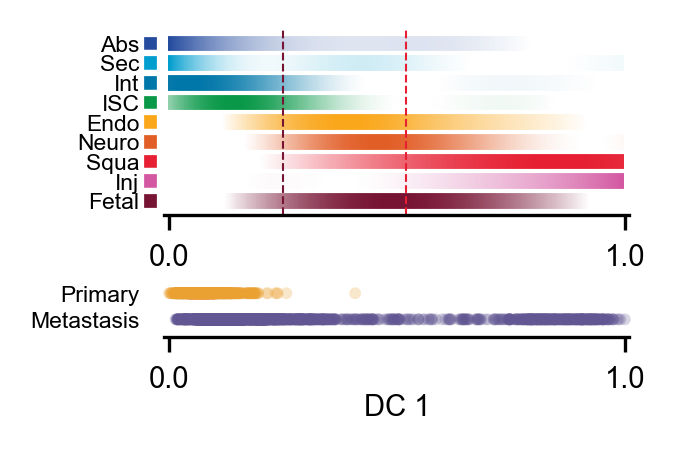

In [50]:
# Features to plot for KG146
modules = [
    'Absorptive Intestine',
    'Secretory Intestine',
    'Intestine',
    'Tumor ISC-like',
    'Endoderm Development',
    'Neuroendocrine',
    'Squamous',
    'Injury Repair',
]
features = [f'Module {m} Score' for m in modules]
features += ['Fetal, Conserved']
peaks = ['Module Squamous Score', 'Fetal, Conserved']

# Plot module progressions
fig = plot_module_progressions(
    ad_146, named_colors, features=features, peaks=peaks, figsize=(2, 1.33)
)

# Additional Formatting
ax = fig.axes[0]
ax.yaxis.set_visible(True)
yticklabels = [abbreviations[m] for m in modules] + ['Fetal']
ax.set_yticks(range(len(yticklabels)), yticklabels)
ax.tick_params(axis='y', length=0, labelsize=5.5, pad=6)

ax = fig.axes[1]
ax.yaxis.set_visible(True)
yticklabels = ['Metastasis', 'Primary']
ax.set_yticks(range(len(yticklabels)), yticklabels)
ax.tick_params(axis='y', length=0, labelsize=5.5, pad=6)
ax.set_xlabel('DC 1', fontsize=7, labelpad=0)

## Figure 2d. Overlaps between modules

In [87]:
# Filter to patients with sufficient cells per sample
sample_sizes = ad_tum.obs.groupby(['Patient', 'Sample Type']).size().unstack()
mask = ad_tum.obs['Patient'].map(sample_sizes.gt(10).all(1))
ad_tum = ad_tum[mask].copy()

In [81]:
# Scores to include in plots
features = [
    'Module Absorptive Intestine Score',
    'Module Secretory Intestine Score',
    'Module Intestine Score',
    'Module Tumor ISC-like Score',
    'Module Endoderm Development Score',
    'Fetal, Conserved',
    'Module Squamous Score',
    'Module Neuroendocrine Score',
]
labels = [x.replace('Module ', '').replace(' Score', '') for x in features]

### Overlaps between modules in *Moorman et al*, KG146, KG182, KG183, KG150

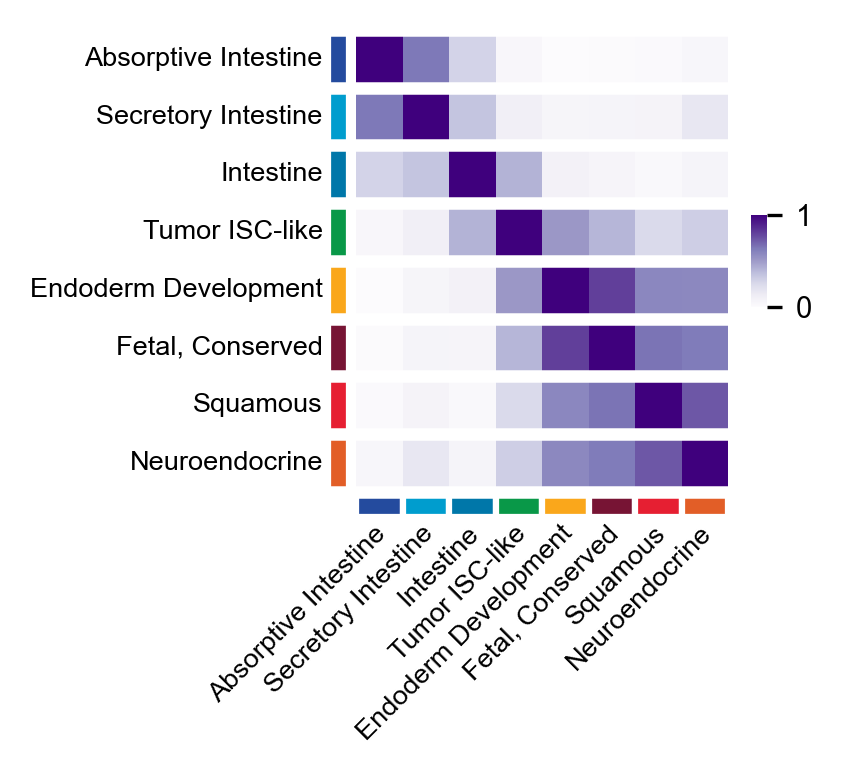

In [82]:
# Plot only for best patients
mask = ad_tum.obs['Patient'].isin([146, 182, 150, 183])
overlaps = get_feature_overlaps(ad_tum[mask], features, 0.75)
fig = plot_overlaps(overlaps, named_colors, labels)
fig.savefig(f'{media_dir}/figure_4d.svg')

### Overlaps between modules in *Moorman et al*, rest

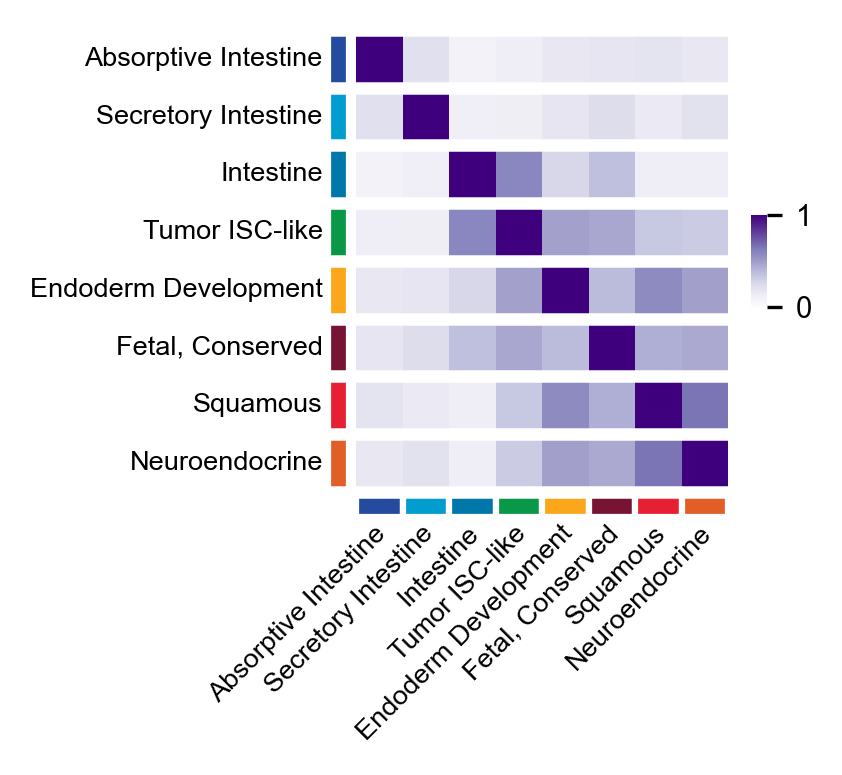

In [83]:
# Plot for patients not in Figure 4
mask = ~ad_tum.obs['Patient'].isin([146, 182, 150, 183])
overlaps = get_feature_overlaps(ad_tum[mask], features, 0.75)
fig = plot_overlaps(overlaps, named_colors, labels)
fig.savefig(f'{media_dir}/figure_4e.svg')

### Overlaps between modules in *Wang et al*

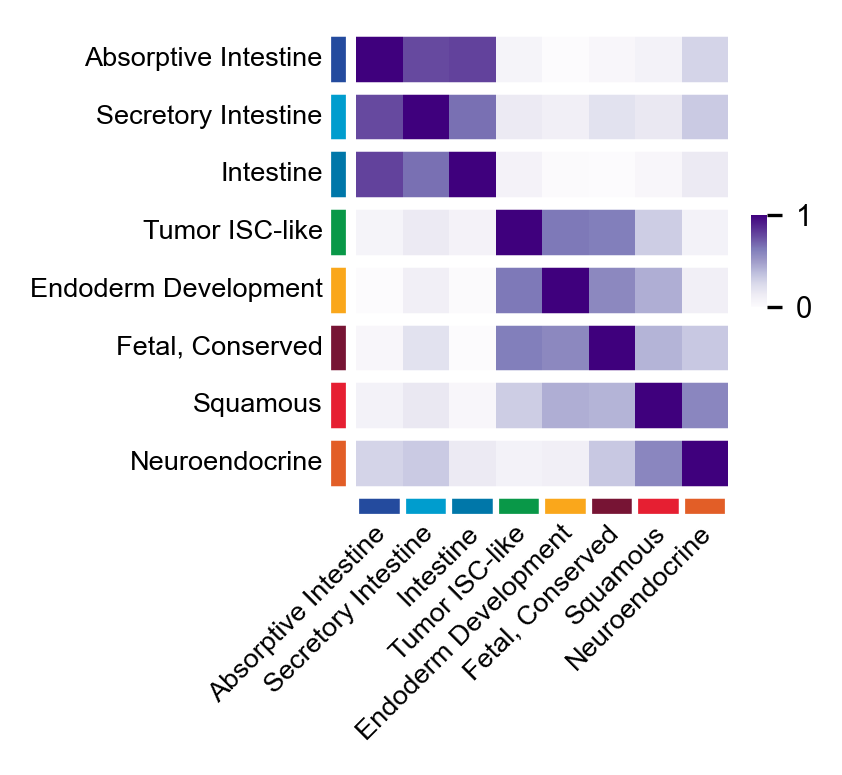

In [67]:
# Plot for Wang et al
overlaps = get_feature_overlaps(ad_wng, features, 0.75)
fig = plot_overlaps(overlaps, named_colors, labels)
fig.savefig(f'{media_dir}/figure_4f.svg')